In [1]:
from numpy import *
from matplotlib.pyplot import *

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

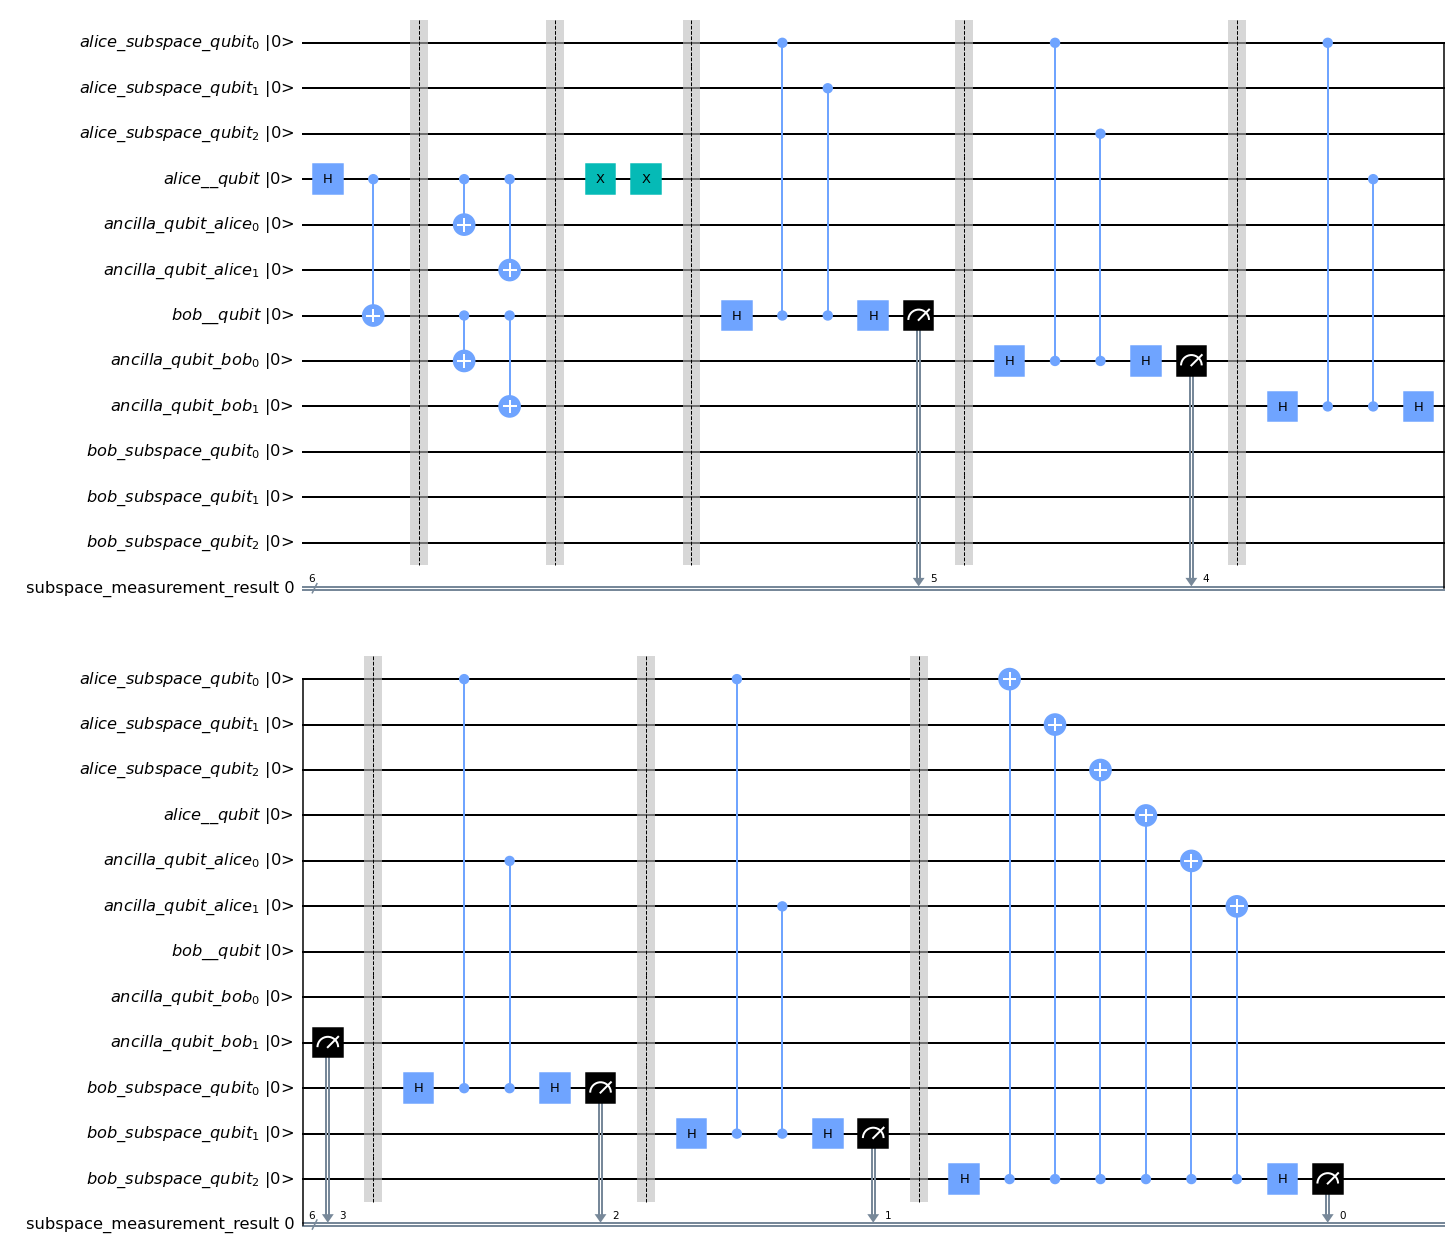

In [8]:
%matplotlib inline
cr= ClassicalRegister(6,"subspace_measurement_result")
alice_qubit= QuantumRegister(1, 'alice__qubit')
bob_qubit= QuantumRegister(1, 'bob__qubit')
subspace_result_a= QuantumRegister(3, 'alice_subspace_qubit')
subspace_result_b= QuantumRegister(3, 'bob_subspace_qubit')
lq1= QuantumRegister(2, 'ancilla_qubit_alice')
lq2= QuantumRegister(2,'ancilla_qubit_bob')

encoded_bell_ckt= QuantumCircuit(subspace_result_a, alice_qubit,lq1,bob_qubit,lq2,subspace_result_b, cr)

encoded_bell_ckt.h(alice_qubit[0])
encoded_bell_ckt.cx(alice_qubit[0],bob_qubit[0])
encoded_bell_ckt.barrier()
encoded_bell_ckt.cx(alice_qubit[0],lq1[0])
encoded_bell_ckt.cx(alice_qubit[0],lq1[1])
encoded_bell_ckt.cx(bob_qubit[0],lq2[0])
encoded_bell_ckt.cx(bob_qubit[0],lq2[1])
encoded_bell_ckt.barrier()
## Error
encoded_bell_ckt.x([3,3])
encoded_bell_ckt.barrier()

#Stabilizer-1
encoded_bell_ckt.h(6)
encoded_bell_ckt.cz(6,[0,1])
encoded_bell_ckt.h(6)
encoded_bell_ckt.measure(6,5)
encoded_bell_ckt.barrier()

#Stabilizer-2
encoded_bell_ckt.h(7)
encoded_bell_ckt.cz(7,[0,2])
encoded_bell_ckt.h(7)
encoded_bell_ckt.measure(7,4)
encoded_bell_ckt.barrier()

#Stabilizer-3
encoded_bell_ckt.h(8)
encoded_bell_ckt.cz(8,[0,3])
encoded_bell_ckt.h(8)
encoded_bell_ckt.measure(8,3)
encoded_bell_ckt.barrier()

#Stabilizer-4
encoded_bell_ckt.h(9)
encoded_bell_ckt.cz(9,[0,4])
encoded_bell_ckt.h(9)
encoded_bell_ckt.measure(9,2)
encoded_bell_ckt.barrier()

#Stabilizer-5
encoded_bell_ckt.h(10)
encoded_bell_ckt.cz(10,[0,5])
encoded_bell_ckt.h(10)
encoded_bell_ckt.measure(10,1)
encoded_bell_ckt.barrier()

#Stabilizer-6
encoded_bell_ckt.h(11)
encoded_bell_ckt.cx(11,[0,1,2,3,4,5])
encoded_bell_ckt.h(11)
encoded_bell_ckt.measure(11,0)

encoded_bell_ckt.draw(output="mpl",initial_state=True)

In [9]:
encoded_bell_ckt.draw(output="mpl",initial_state=True).savefig("Fig13.png",dpi=1200,bbox_inches="tight")

In [4]:
sim = Aer.get_backend('qasm_simulator') 
result= execute(encoded_bell_ckt, backend=sim).result().get_counts()
print(result)

{'110 110': 270, '000 001': 243, '110 111': 247, '000 000': 264}


In [5]:
from itertools import combinations as comb
def syn(count):
    s=''; arry=[];
    for j in list(count.keys())[0]:
            if j=='0':
                s = s+ ' +1 '
                arry.append(1)
            if j=='1':
                s = s+ ' -1 '
                arry.append(-1)
                
    return s, arry

def err(arr,j):
    s='';
    for i in range(6):
        if(i in arr):
            if(j==1):
                s = s + ' X '
            elif(j==2):
                s = s + 'Z'
        else:
            s = s + ' I '
    return s

In [6]:
syndromes1 = [[1,1,1,1,1,1]]
count = 0
for i in range(1,4):
    iter = comb(list(range(6)),i);
    for k in iter:
        j= list(k);
        count = count + 1; 
        cr= ClassicalRegister(6,"subspace_measurement")
        alice_qubit= QuantumRegister(1, 'alice__qubit')
        bob_qubit= QuantumRegister(1, 'bob__qubit')
        subspace_result= QuantumRegister(6, 'subspace_result')
        lq1= QuantumRegister(2, 'ancilla_qubit_alice')
        lq2= QuantumRegister(2,'ancilla_qubit_bob')

        encoded_bell_ckt= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,subspace_result, cr)

        encoded_bell_ckt.h(alice_qubit[0])
        encoded_bell_ckt.cx(alice_qubit[0],bob_qubit[0])
        encoded_bell_ckt.barrier()
        encoded_bell_ckt.cx(alice_qubit[0],lq1[0])
        encoded_bell_ckt.cx(alice_qubit[0],lq1[1])
        encoded_bell_ckt.cx(bob_qubit[0],lq2[0])
        encoded_bell_ckt.cx(bob_qubit[0],lq2[1])
        encoded_bell_ckt.barrier()
        ## Error
        encoded_bell_ckt.x(j)
        encoded_bell_ckt.barrier()

        #Stabilizer-1
        encoded_bell_ckt.h(6)
        encoded_bell_ckt.cz(6,[0,1])
        encoded_bell_ckt.h(6)
        encoded_bell_ckt.measure(6,5)
        encoded_bell_ckt.barrier()

        #Stabilizer-2
        encoded_bell_ckt.h(7)
        encoded_bell_ckt.cz(7,[0,2])
        encoded_bell_ckt.h(7)
        encoded_bell_ckt.measure(7,4)
        encoded_bell_ckt.barrier()

        #Stabilizer-3
        encoded_bell_ckt.h(8)
        encoded_bell_ckt.cz(8,[0,3])
        encoded_bell_ckt.h(8)
        encoded_bell_ckt.measure(8,3)
        encoded_bell_ckt.barrier()

        #Stabilizer-4
        encoded_bell_ckt.h(9)
        encoded_bell_ckt.cz(9,[0,4])
        encoded_bell_ckt.h(9)
        encoded_bell_ckt.measure(9,2)
        encoded_bell_ckt.barrier()

        #Stabilizer-5
        encoded_bell_ckt.h(10)
        encoded_bell_ckt.cz(10,[0,5])
        encoded_bell_ckt.h(10)
        encoded_bell_ckt.measure(10,1)
        encoded_bell_ckt.barrier()

        #Stabilizer-6
        encoded_bell_ckt.h(11)
        encoded_bell_ckt.cx(11,[0,1,2,3,4,5])
        encoded_bell_ckt.h(11)
        encoded_bell_ckt.measure(11,0)
        
        result= execute(encoded_bell_ckt, backend=sim).result().get_counts()
        syndrome, syndrme = syn(result)
        syndromes1.append(syndrme)
        error = err(j,1)
        print(error, " --> ", syndrome)
        if(count == 31):
            break

 X  I  I  I  I  I   -->   -1  -1  -1  -1  -1  +1 
 I  X  I  I  I  I   -->   -1  +1  +1  +1  +1  +1 
 I  I  X  I  I  I   -->   +1  -1  +1  +1  +1  +1 
 I  I  I  X  I  I   -->   +1  +1  -1  +1  +1  +1 
 I  I  I  I  X  I   -->   +1  +1  +1  -1  +1  +1 
 I  I  I  I  I  X   -->   +1  +1  +1  +1  -1  +1 
 X  X  I  I  I  I   -->   +1  -1  -1  -1  -1  +1 
 X  I  X  I  I  I   -->   -1  +1  -1  -1  -1  +1 
 X  I  I  X  I  I   -->   -1  -1  +1  -1  -1  +1 
 X  I  I  I  X  I   -->   -1  -1  -1  +1  -1  +1 
 X  I  I  I  I  X   -->   -1  -1  -1  -1  +1  +1 
 I  X  X  I  I  I   -->   -1  -1  +1  +1  +1  +1 
 I  X  I  X  I  I   -->   -1  +1  -1  +1  +1  +1 
 I  X  I  I  X  I   -->   -1  +1  +1  -1  +1  +1 
 I  X  I  I  I  X   -->   -1  +1  +1  +1  -1  +1 
 I  I  X  X  I  I   -->   +1  -1  -1  +1  +1  +1 
 I  I  X  I  X  I   -->   +1  -1  +1  -1  +1  +1 
 I  I  X  I  I  X   -->   +1  -1  +1  +1  -1  +1 
 I  I  I  X  X  I   -->   +1  +1  -1  -1  +1  +1 
 I  I  I  X  I  X   -->   +1  +1  -1  +1  -1  +1 


In [14]:
encoded_bell_ckt.draw(output="mpl",initial_state=True).savefig("stabilizer.png",dpi=400,bbox_inches="tight")

In [15]:
encoded_bell_ckt.draw(output="mpl",initial_state=True).savefig("stabilizer.png",dpi=400,bbox_inches="tight")

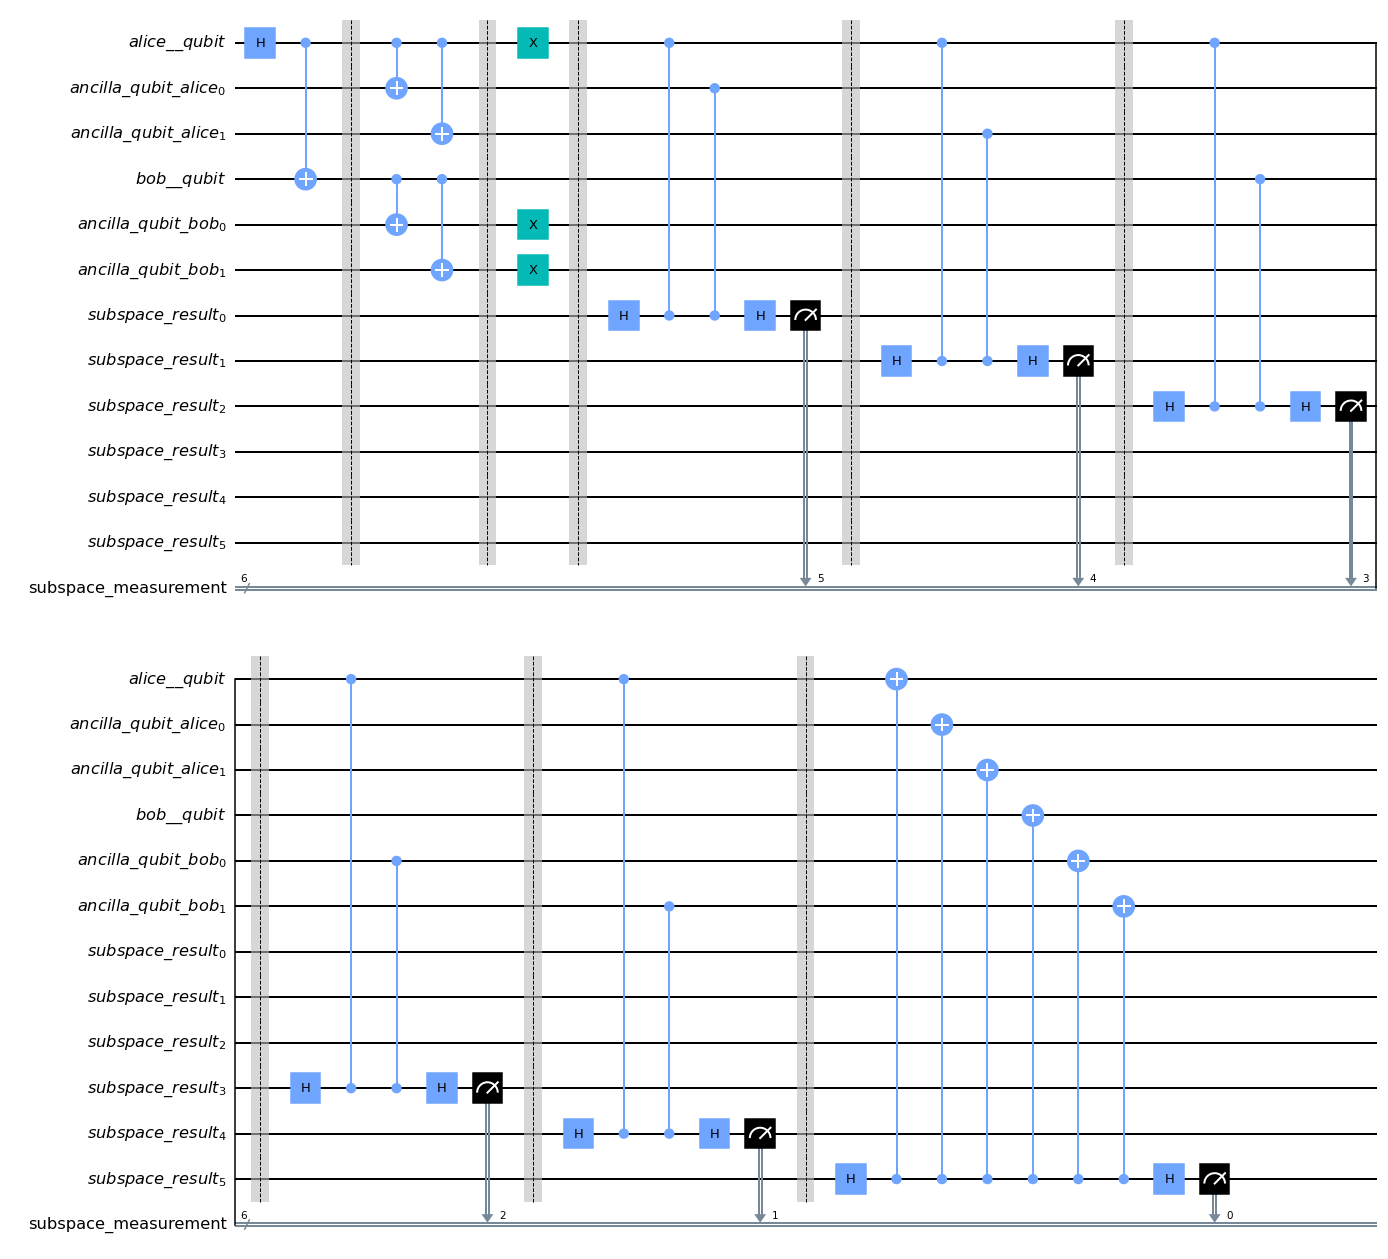

In [8]:
encoded_bell_ckt.draw(output='mpl')

In [9]:
for i in range(32):
    for j in range(i+1,32):
        if(syndromes1[j]== syndromes1[i]):
            print(syndromes1[i])
        else:
            #print("Nope")
            pass

In [10]:
syndromes2 = [[1,1,1,1,1,1]]
count = 0
for i in range(1,4):
    iter = comb(list(range(6)),i);
    for k in iter:
        j= list(k);
        count = count + 1; 
        cr= ClassicalRegister(6,"subspace_measurement")
        alice_qubit= QuantumRegister(1, 'alice__qubit')
        bob_qubit= QuantumRegister(1, 'bob__qubit')
        subspace_result= QuantumRegister(6, 'subspace_result')
        lq1= QuantumRegister(2, 'ancilla_qubit_alice')
        lq2= QuantumRegister(2,'ancilla_qubit_bob')

        encoded_bell_ckt= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,subspace_result, cr)

        encoded_bell_ckt.h(alice_qubit[0])
        encoded_bell_ckt.cx(alice_qubit[0],bob_qubit[0])
        encoded_bell_ckt.barrier()
        encoded_bell_ckt.cx(alice_qubit[0],lq1[0])
        encoded_bell_ckt.cx(alice_qubit[0],lq1[1])
        encoded_bell_ckt.cx(bob_qubit[0],lq2[0])
        encoded_bell_ckt.cx(bob_qubit[0],lq2[1])
        encoded_bell_ckt.barrier()
        ## Error
        encoded_bell_ckt.z(j)
        encoded_bell_ckt.barrier()

        #Stabilizer-1
        encoded_bell_ckt.h(6)
        encoded_bell_ckt.cz(6,[0,1])
        encoded_bell_ckt.h(6)
        encoded_bell_ckt.measure(6,5)
        encoded_bell_ckt.barrier()

        #Stabilizer-2
        encoded_bell_ckt.h(7)
        encoded_bell_ckt.cz(7,[0,2])
        encoded_bell_ckt.h(7)
        encoded_bell_ckt.measure(7,4)
        encoded_bell_ckt.barrier()

        #Stabilizer-3
        encoded_bell_ckt.h(8)
        encoded_bell_ckt.cz(8,[0,3])
        encoded_bell_ckt.h(8)
        encoded_bell_ckt.measure(8,3)
        encoded_bell_ckt.barrier()

        #Stabilizer-4
        encoded_bell_ckt.h(9)
        encoded_bell_ckt.cz(9,[0,4])
        encoded_bell_ckt.h(9)
        encoded_bell_ckt.measure(9,2)
        encoded_bell_ckt.barrier()

        #Stabilizer-5
        encoded_bell_ckt.h(10)
        encoded_bell_ckt.cz(10,[0,5])
        encoded_bell_ckt.h(10)
        encoded_bell_ckt.measure(10,1)
        encoded_bell_ckt.barrier()

        #Stabilizer-6
        encoded_bell_ckt.h(11)
        encoded_bell_ckt.cx(11,[0,1,2,3,4,5])
        encoded_bell_ckt.h(11)
        encoded_bell_ckt.measure(11,0)
        
        result= execute(encoded_bell_ckt, backend=sim).result().get_counts()
        syndrome, syndrme = syn(result)
        syndromes2.append(syndrme)
        error = err(j,2)
        print(error, " --> ", syndrome)
        if(count == 31):
            break

Z I  I  I  I  I   -->   +1  +1  +1  +1  +1  -1 
 I Z I  I  I  I   -->   +1  +1  +1  +1  +1  -1 
 I  I Z I  I  I   -->   +1  +1  +1  +1  +1  -1 
 I  I  I Z I  I   -->   +1  +1  +1  +1  +1  -1 
 I  I  I  I Z I   -->   +1  +1  +1  +1  +1  -1 
 I  I  I  I  I Z  -->   +1  +1  +1  +1  +1  -1 
ZZ I  I  I  I   -->   +1  +1  +1  +1  +1  +1 
Z I Z I  I  I   -->   +1  +1  +1  +1  +1  +1 
Z I  I Z I  I   -->   +1  +1  +1  +1  +1  +1 
Z I  I  I Z I   -->   +1  +1  +1  +1  +1  +1 
Z I  I  I  I Z  -->   +1  +1  +1  +1  +1  +1 
 I ZZ I  I  I   -->   +1  +1  +1  +1  +1  +1 
 I Z I Z I  I   -->   +1  +1  +1  +1  +1  +1 
 I Z I  I Z I   -->   +1  +1  +1  +1  +1  +1 
 I Z I  I  I Z  -->   +1  +1  +1  +1  +1  +1 
 I  I ZZ I  I   -->   +1  +1  +1  +1  +1  +1 
 I  I Z I Z I   -->   +1  +1  +1  +1  +1  +1 
 I  I Z I  I Z  -->   +1  +1  +1  +1  +1  +1 
 I  I  I ZZ I   -->   +1  +1  +1  +1  +1  +1 
 I  I  I Z I Z  -->   +1  +1  +1  +1  +1  +1 
 I  I  I  I ZZ  -->   +1  +1  +1  +1  +1  +1 
ZZZ I  I  I   -->   +1

In [11]:
count = 0
for i in range(32):
    for j in range(i+1,32):
        if(syndromes2[j]== syndromes2[i]):
            #print(syndromes[i])
            count = count + 1
        else:
            #print("Nope")
            pass
print(count)

240


In [12]:
syndromes1==syndromes2

False

In [13]:
syndromes1 = [[1,1,1,1,1,1]]
count = 0
for i in range(1,4):
    iter = comb(list(range(6)),i);
    for k in iter:
        j= list(k);
        count = count + 1; 
        cr= ClassicalRegister(6,"subspace_measurement")
        alice_qubit= QuantumRegister(1, 'alice__qubit')
        bob_qubit= QuantumRegister(1, 'bob__qubit')
        subspace_result= QuantumRegister(6, 'subspace_result')
        lq1= QuantumRegister(2, 'ancilla_qubit_alice')
        lq2= QuantumRegister(2,'ancilla_qubit_bob')

        encoded_bell_ckt= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,subspace_result, cr)

        encoded_bell_ckt.h(alice_qubit[0])
        encoded_bell_ckt.cx(alice_qubit[0],bob_qubit[0])
        encoded_bell_ckt.barrier()
        encoded_bell_ckt.cx(alice_qubit[0],lq1[0])
        encoded_bell_ckt.cx(alice_qubit[0],lq1[1])
        encoded_bell_ckt.cx(bob_qubit[0],lq2[0])
        encoded_bell_ckt.cx(bob_qubit[0],lq2[1])
        encoded_bell_ckt.barrier()
        ## Error
        encoded_bell_ckt.x(j)
        encoded_bell_ckt.barrier()

        #Stabilizer-2
        encoded_bell_ckt.h(7)
        encoded_bell_ckt.cz(7,[0,1])
        encoded_bell_ckt.h(7)
        encoded_bell_ckt.measure(7,4)
        encoded_bell_ckt.barrier()

        #Stabilizer-2
        encoded_bell_ckt.h(8)
        encoded_bell_ckt.cz(8,[0,2])
        encoded_bell_ckt.h(8)
        encoded_bell_ckt.measure(8,3)
        encoded_bell_ckt.barrier()

        #Stabilizer-3
        encoded_bell_ckt.h(9)
        encoded_bell_ckt.cz(9,[0,3])
        encoded_bell_ckt.h(9)
        encoded_bell_ckt.measure(9,2)
        encoded_bell_ckt.barrier()

        #Stabilizer-4
        encoded_bell_ckt.h(10)
        encoded_bell_ckt.cz(9,[0,1])
        encoded_bell_ckt.h(9)
        encoded_bell_ckt.measure(9,2)
        encoded_bell_ckt.barrier()

        #Stabilizer-5
        encoded_bell_ckt.h(10)
        encoded_bell_ckt.cz(10,[0,5])
        encoded_bell_ckt.h(10)
        encoded_bell_ckt.measure(10,1)
        encoded_bell_ckt.barrier()

        #Stabilizer-6
        encoded_bell_ckt.h(11)
        encoded_bell_ckt.cx(11,[0,1,2,3,4,5])
        encoded_bell_ckt.h(11)
        encoded_bell_ckt.measure(11,0)
        
        result= execute(encoded_bell_ckt, backend=sim).result().get_counts()
        syndrome, syndrme = syn(result)
        syndromes1.append(syndrme)
        error = err(j,1)
        print(error, " --> ", syndrome)
        if(count == 31):
            break

 X  I  I  I  I  I   -->   +1  -1  -1  +1  -1  +1 
 I  X  I  I  I  I   -->   +1  -1  +1  +1  +1  +1 
 I  I  X  I  I  I   -->   +1  +1  -1  -1  -1  +1 
 I  I  I  X  I  I   -->   +1  +1  +1  -1  +1  +1 
 I  I  I  I  X  I   -->   +1  +1  +1  +1  +1  +1 
 I  I  I  I  I  X   -->   +1  +1  +1  -1  +1  +1 
 X  X  I  I  I  I   -->   +1  +1  -1  -1  -1  +1 
 X  I  X  I  I  I   -->   +1  -1  +1  -1  +1  +1 
 X  I  I  X  I  I   -->   +1  -1  -1  +1  +1  +1 
 X  I  I  I  X  I   -->   +1  -1  -1  +1  -1  +1 
 X  I  I  I  I  X   -->   +1  -1  -1  +1  +1  +1 
 I  X  X  I  I  I   -->   +1  -1  -1  -1  +1  +1 
 I  X  I  X  I  I   -->   +1  -1  +1  +1  -1  +1 
 I  X  I  I  X  I   -->   +1  -1  +1  +1  +1  +1 
 I  X  I  I  I  X   -->   +1  -1  +1  +1  -1  +1 
 I  I  X  X  I  I   -->   +1  +1  -1  +1  -1  +1 
 I  I  X  I  X  I   -->   +1  +1  -1  -1  +1  +1 
 I  I  X  I  I  X   -->   +1  +1  -1  +1  -1  +1 
 I  I  I  X  X  I   -->   +1  +1  +1  +1  +1  +1 
 I  I  I  X  I  X   -->   +1  +1  +1  -1  -1  +1 
